## Задание 1

In [14]:
import scipy as sp
import numpy as np
import matplotlib.pyplot as plt

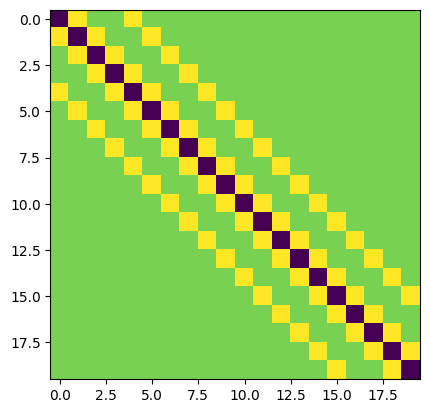

In [16]:
A = sp.sparse.diags([[-4]*20, [1]*19, [1]*19, [1]*16, [1]*16],[0, -1, 1, 4, -4]).toarray()
plt.imshow(A)

In [19]:
b = np.zeros(A.shape[0])
b[A.shape[0]//2] = -1
b

array([ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0., -1.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.])

Сначала метод 2:

In [28]:
sp.sparse.linalg.spsolve(A,b)

C:\Users\Матвей\AppData\Local\Temp\ipykernel_1472\970048716.py:1: SparseEfficiencyWarning: spsolve requires A be CSC or CSR matrix format
  sp.sparse.linalg.spsolve(A,b)


array([0.06372916, 0.09887354, 0.12513814, 0.12788729, 0.15604308,
       0.20662688, 0.27379172, 0.23036794, 0.22592901, 0.29779917,
       0.53303391, 0.29386375, 0.21950584, 0.2256069 , 0.26668099,
       0.1925473 , 0.13262369, 0.11844161, 0.11553585, 0.07702079])

Теперь метод 1:

[0.06372916 0.09887354 0.12513814 0.12788729 0.15604308 0.20662688
 0.27379172 0.23036794 0.22592901 0.29779917 0.53303391 0.29386375
 0.21950584 0.2256069  0.26668099 0.1925473  0.13262369 0.11844161
 0.11553585 0.07702079]


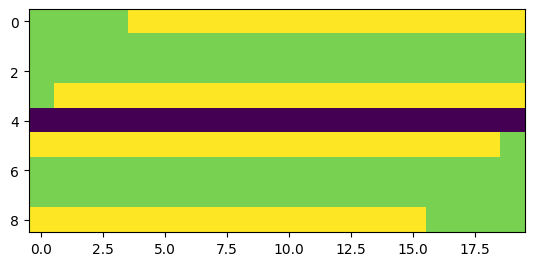

In [90]:
ab = np.zeros((9,20))
for j in range(0,20):
    for i in range(0,20):
        if -9<4+i-j<9:
            ab[4+i-j,j] = A[i,j]
        

plt.imshow(ab)
solution = sp.linalg.solve_banded((4,4), ab, b)
print(solution)

Решения, полученными двумя разными встроенными методами, совпадают.

## Задание 2

In [111]:
B = np.array([[7, 0],[0, 7]])
np.linalg.inv(B)

array([[0.14285714, 0.        ],
       [0.        , 0.14285714]])

In [130]:
def inv(matrix, order, epsilon):
    inv = np.linalg.inv(matrix).round(1)
    psi= np.eye(np.shape(matrix)[0])-matrix@inv
    sum = np.zeros((np.shape(matrix)[0], np.shape(matrix)[0]))
    while np.linalg.norm(psi, 2) > epsilon:
        for i in range (1, order+1):
            sum += (psi)**i
        sum += np.eye(np.shape(matrix)[0])
        inv = inv@sum
        psi= np.eye(np.shape(matrix)[0])-matrix@inv
    return inv

In [132]:
inv(B, 10, 0.0001)

array([[0.14285689, 0.        ],
       [0.        , 0.14285689]])

Вычисленная при помощи встроенной в нампи функции обратная матрица отличается от полученной в методе Шульца не более чем на величину указанной погрешности 0.0001